In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy.stats import norm

In [2]:
data = pd.read_csv("600280.SS.csv")

In [3]:
## Calculate Return
data = data.reset_index()
data["shift"] =  data["Adj Close"].shift()
data["Return"] = (data["Adj Close"] - data["shift"])/data["shift"]
data = data.drop(["Open", "High", "Low", "shift"], axis = 1)
data = data.drop(["index"], axis = 1).iloc[1:,:]
data

,Date,Close,Adj Close,Volume,Return
1,2000-09-27,1.794982,1.523565,74228665.0,0.012195
2,2000-09-28,1.801470,1.529072,50998771.0,0.003615
3,2000-09-29,1.840397,1.562113,31769256.0,0.021609
4,2000-10-02,NaN,NaN,NaN,NaN
5,2000-10-03,NaN,NaN,NaN,NaN
6,2000-10-04,NaN,NaN,NaN,NaN
7,2000-10-05,NaN,NaN,NaN,NaN
8,2000-10-06,NaN,NaN,NaN,NaN
9,2000-10-09,1.814446,1.540086,18375794.0,NaN
10,2000-10-10,1.886894,1.601579,24968813.0,0.039928


In [4]:
## Select Specific Date
stock_data = data
stock_data["Date"] = pd.to_datetime(stock_data["Date"])
start_date = "1999-01-01"; end_date = "2022-10-28"
period = (stock_data['Date'] > start_date) & (stock_data['Date'] <= end_date)
stock_data = stock_data.loc[period]
stock_data

,Date,Close,Adj Close,Volume,Return
1,2000-09-27,1.794982,1.523565,74228665.0,0.012195
2,2000-09-28,1.801470,1.529072,50998771.0,0.003615
3,2000-09-29,1.840397,1.562113,31769256.0,0.021609
4,2000-10-02,NaN,NaN,NaN,NaN
5,2000-10-03,NaN,NaN,NaN,NaN
6,2000-10-04,NaN,NaN,NaN,NaN
7,2000-10-05,NaN,NaN,NaN,NaN
8,2000-10-06,NaN,NaN,NaN,NaN
9,2000-10-09,1.814446,1.540086,18375794.0,NaN
10,2000-10-10,1.886894,1.601579,24968813.0,0.039928


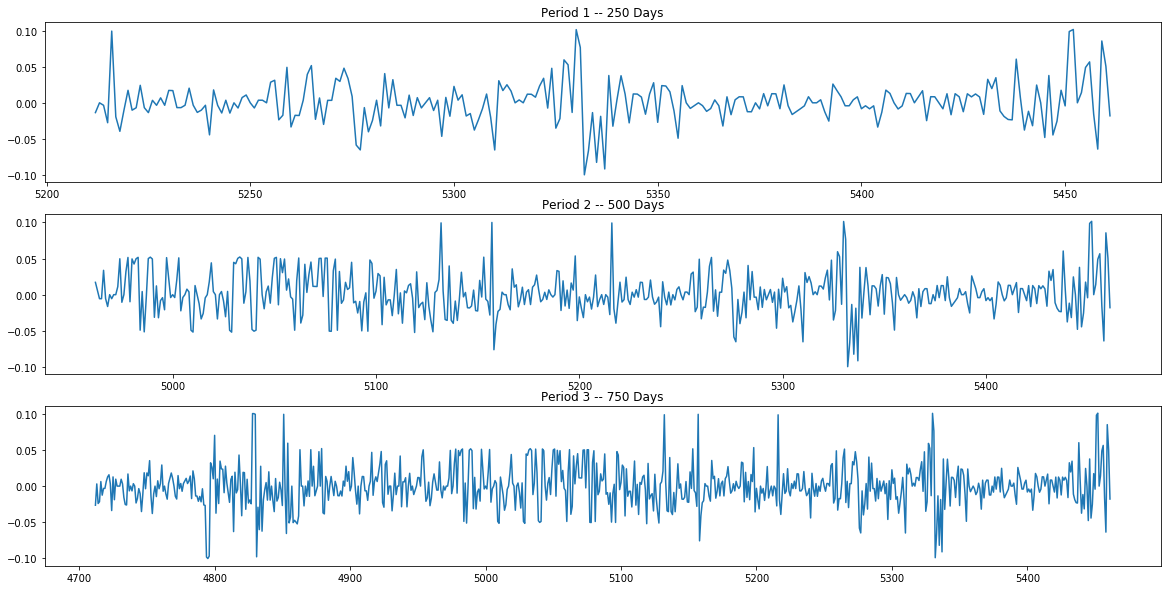

In [5]:
### 1、 观测数据整理
df_period_1 = stock_data.tail(250)
df_period_2 = stock_data.tail(500)
df_period_3 = stock_data.tail(750)
## Plot
plt.figure(figsize=(20, 10)) 
plt.subplot(3,1,1)
plt.title("Period 1 -- 250 Days")  
plt.plot(df_period_1["Return"])
plt.subplot(3,1,2)
plt.title("Period 2 -- 500 Days")  
plt.plot(df_period_2["Return"])
plt.subplot(3,1,3)
plt.title("Period 3 -- 750 Days")  
plt.plot(df_period_3["Return"])
plt.show()

In [8]:
### 2、简单历史收益风险分析
def cal_mean_sd(df, col = "Return"):
    return df[col].mean(), df[col].std()
df_list = [df_period_1, df_period_2, df_period_3]
period_list = ["Period 1 -- 250 Days", "Period 2 -- 500 Days", "Period 3 -- 750 Days"]
mean_list = []; sd_list = []
for i in df_list:
    mean_list.append(cal_mean_sd(i, col = "Return")[0])
    sd_list.append(cal_mean_sd(i, col = "Return")[1])
p1_df = pd.DataFrame({"Period": period_list, "Mean Return": mean_list, "Sta Deviation": sd_list})
p1_df

,Period,Mean Return,Sta Deviation
0,Period 1 -- 250 Days,0.000817,0.028594
1,Period 2 -- 500 Days,0.001663,0.029212
2,Period 3 -- 750 Days,0.000378,0.029116


In [9]:
### 3、非参数历史收益风险分析

def cal_percentile_sort(df, col_name, col = "Return"):
    df = df.sort_values(col, ascending = True)
    df_return = pd.DataFrame({col_name+"百分位": [1, 5, 10, 25, 50, 75, 90, 95, 99],
                              col_name+"百分位对应Return": np.percentile(df[col], [1, 5, 10, 25, 50, 75, 90, 95, 99])})
    return df_return
   
pd.concat([cal_percentile_sort(df_period_1, "Period 1 ", col = "Return"),
           cal_percentile_sort(df_period_2, "Period 2 ", col = "Return"),
           cal_percentile_sort(df_period_3, "Period 3 ", col = "Return")], axis = 1)

,Period 1 百分位,Period 1 百分位对应Return,Period 2 百分位,Period 2 百分位对应Return,Period 3 百分位,Period 3 百分位对应Return
0,1,-0.074625,1,-0.065318,1,-0.071449
1,5,-0.042463,5,-0.049063,5,-0.048648
2,10,-0.027990,10,-0.033613,10,-0.033613
3,25,-0.013322,25,-0.013722,25,-0.014546
4,50,0.000000,50,0.000000,50,0.000000
5,75,0.012539,75,0.015396,75,0.012821
6,90,0.032622,90,0.044125,90,0.037962
7,95,0.049046,95,0.050641,95,0.050439
8,99,0.099007,99,0.098718,99,0.099354


In [10]:
### 4、参数历史收益风险分析
## attention: numOfpart is 15 means cut 15 times, which indicates that the list will be divdided into 16 parts. 
def divide_avg(start_num, end_num, numOfpart):
    return_list = []
    distance = abs(end_num - start_num)
    each_distance = abs(end_num - start_num)/numOfpart
    for i in range(numOfpart+1):
        return_list.append(round(start_num+each_distance*i,2))
    return return_list

def calculte_num(part_list, df):
    count_list = []
    name_list = []
    for j in range(len(part_list)-1):
        count = 0
        for i in df.tolist():
            if part_list[j] < i <= part_list[j+1]:
                count += 1
        count_list.append(count)
        name_list.append("("+str(part_list[j])+","+str(part_list[j+1])+")")
    count_list[0] = count_list[0] + 1
    result_df = pd.DataFrame({"区间":name_list, "数量":count_list})
    return result_df

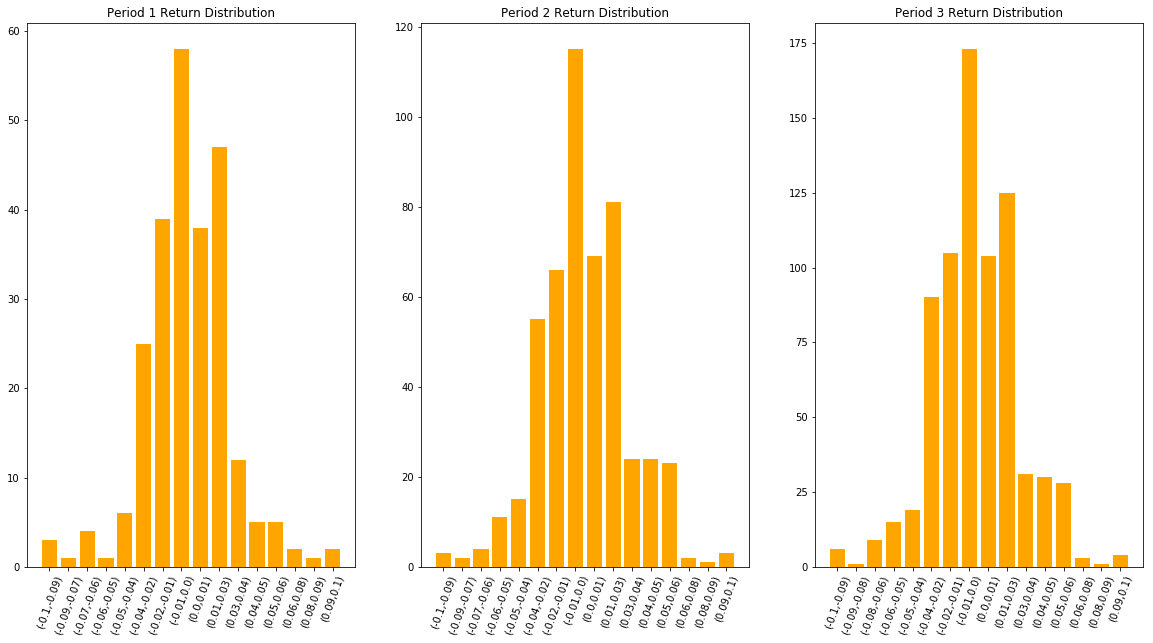

In [11]:
stock_df_order = df_period_1.sort_values("Return")
df = calculte_num(divide_avg(stock_df_order.iloc[0,4], stock_df_order.iloc[-1,4], 16), stock_df_order["Return"])
plt.figure(figsize=(20, 10)) 
plt.subplot(1,3,1)
plt.bar(range(len(df["数量"])),  df["数量"], tick_label=df["区间"], color = "orange", align='center')
plt.xticks(rotation=70) 
plt.title("Period 1"+" Return Distribution")
stock_df_order = df_period_2.sort_values("Return")
df = calculte_num(divide_avg(stock_df_order.iloc[0,4], stock_df_order.iloc[-1,4], 16), stock_df_order["Return"])
plt.subplot(1,3,2)
plt.bar(range(len(df["数量"])),  df["数量"], tick_label=df["区间"], color = "orange", align='center')
plt.xticks(rotation=70) 
plt.title("Period 2"+" Return Distribution")
stock_df_order = df_period_3.sort_values("Return")
df = calculte_num(divide_avg(stock_df_order.iloc[0,4], stock_df_order.iloc[-1,4], 16), stock_df_order["Return"])
plt.subplot(1,3,3)
plt.bar(range(len(df["数量"])),  df["数量"], tick_label=df["区间"], color = "orange", align='center')
plt.xticks(rotation=70) 
plt.title("Period 3"+" Return Distribution")
plt.show()



In [12]:
def cal_percentile_sort(df, col_name, col = "Return"):
    df_return = pd.DataFrame({col_name+"百分位": [1, 5, 10, 25, 50, 75, 90, 95, 99],
                              col_name+"百分位对应Return": norm.ppf(q=[0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99], loc=df.iloc[0,1], scale=df.iloc[0,2])})
    return df_return

pd.concat([cal_percentile_sort(p1_df[p1_df["Period"] == "Period 1 -- 250 Days"], "Period 1 ", col = "Return"),
           cal_percentile_sort(p1_df[p1_df["Period"] == "Period 2 -- 500 Days"], "Period 2 ", col = "Return"),
           cal_percentile_sort(p1_df[p1_df["Period"] == "Period 3 -- 750 Days"], "Period 3 ", col = "Return")], axis = 1)

,Period 1 百分位,Period 1 百分位对应Return,Period 2 百分位,Period 2 百分位对应Return,Period 3 百分位,Period 3 百分位对应Return
0,1,-0.065703,1,-0.066295,1,-0.067357
1,5,-0.046216,5,-0.046387,5,-0.047514
2,10,-0.035828,10,-0.035774,10,-0.036936
3,25,-0.018469,25,-0.018040,25,-0.019261
4,50,0.000817,50,0.001663,50,0.000378
5,75,0.020104,75,0.021366,75,0.020016
6,90,0.037462,90,0.039100,90,0.037692
7,95,0.047850,95,0.049713,95,0.048270
8,99,0.067337,99,0.069621,99,0.068113
